# NOTEBOOK D'ANALYSE DES DONNEES CMBM
Tipee propose de réaliser une campagne de mesure comparative sur un bâtiment équipé du système Bartic®. Celui-ci a été défini conjointement avec CMBM. Le suivi d’une température opérative sous une toiture Bartic® et d’une température de surface en sous face de cette même toiture seront réalisées sur une période estivale significative et représentative, de l’ordre de plusieurs jours à quelques semaines, à adapter selon les contraintes du site.

Ces deux grandeurs physiques devront être comparées aux mêmes mesures obtenues sur un bâtiment équipé par un système constructif plus traditionnel (fibrociment). Le site a été identifié avec CMBM. 
Le document présente le site et le protocole expérimental retenu.
#### -----------

Le site est situé au lieu-dit Le Fourniou, 16500 Abzac, il s’agit de deux bâtiments agricoles de typologie similaire (ouvert), avec des pans de toiture ayant même orientation et de pentes similaires. L’un est recouvert du procédé Bartic® avec des profilés 324, l’autre est le bâtiment de référence avec des panneaux ondulés en fibrociment.
#### -----------
<img src="./figures/intro1.jpg" alt="drawing" width="450" align="center"/>

En observant la configuration du Faîtage du procédé BARTIC on s’aperçoit que celui-ci est ventilé, c’est-à-dire que les canaux ne sont pas bouchés, et qu’un volume d’air est disponible à leur sortie. Cependant, l’effet aérodynamique du vent sur la sortie des canaux semble compromis.
<img src="./figures/faitage.png" alt="drawing" width="450" align="center"/>

Les emplacements des mesures sont répertoriés ci-dessous. Le schéma est identique pour les 2 bâtiments.
#### -----------
<img src="./figures/emplacement.png" alt="drawing" width="500" align="center"/>



<img src="./schema/capteurs.png" alt="drawing" width="1000" align="center"/>


<font size="3"> **Ref** : Ferme de stokage de paille : toiture fibro-ciment</font> 

<font size="3"> **Bartic** : Ferme à vaches : toiture Bartic avec "récupération de chaleur"</font> 

In [1]:
import glob
import pandas as pd
# dictionnaire principal
cmbm = {}

# choix de la période

In [2]:
import datetime
import ipywidgets as widgets
ibutton=widgets.DatePicker(
    description='date début',
    value = datetime.date(2021, 8, 1),
    disabled=False)

ebutton=widgets.DatePicker(
    description='date fin',
    value = datetime.date(2021, 9, 1),
    disabled=False
)

In [3]:
from IPython.display import Javascript, display
from ipywidgets import widgets

def run_all(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.ncells())'))

button = widgets.Button(description="Lancer le calcul")
button.on_click(run_all)
display(button)


Button(description='Lancer le calcul', style=ButtonStyle())

In [4]:
i = ibutton.value.strftime("%Y-%m-%d")
e = ebutton.value.strftime("%Y-%m-%d")

In [5]:
i = '2021-08-10'
e = '2021-08-13'

#### récupération des mats de conforts

In [6]:
listeMat = glob.glob('./Mat_confort/*.csv')
#[pathDuExcel, skiprow]
dicoMat = {
    'bartic' : [listeMat[0], [4406]],
    'fibrociment' : [listeMat[1], list(range(4321, 4368))]
}
matColumns = ['date','Tw [°C]','Tg [°C]','Ta [°C]','Pr [hPa]',
                'RH [%]','Va [m/s]','Tr [°C]','WBGT(i) [°C]','WBGT(o) [°C]',
                'WCI [°C]']
for cas in dicoMat:
    cmbm[cas] = {}
    cmbm[cas]['mat-'+cas] = pd.read_csv(dicoMat[cas][0], sep = '; ', engine = 'python', skiprows = dicoMat[cas][1])
    cmbm[cas]['mat-'+cas].columns = matColumns
    listeDate = []
    for dt in cmbm[cas]['mat-'+cas]['date']:
        listeDate.append(dt.split('=')[-1])
    cmbm[cas]['mat-'+cas].index = pd.to_datetime(listeDate)
    cmbm[cas]['mat-'+cas] = cmbm[cas]['mat-'+cas][i:e].resample('30min').mean()
    

#### récupération des tinyTags

In [7]:
listeTiny = glob.glob('./TinyTags/*.xlsx')
dicoTiny = {
'bartic': ['691956','886651','692455','886615','886055','401440','401439'],
'fibrociment' : ['742839', '859067', '886638', '401443', '691948']
}
for cas in dicoTiny:
    for tiny in dicoTiny[cas]:
#         cmbm[cas]['tiny-'+tiny] = pd.read_csv('./TinyTags/{}.csv'.format(tiny),sep = ',', engine = 'python', skiprows = 10)
        cmbm[cas]['tiny-'+tiny] = pd.read_excel('./TinyTags/{}.xlsx'.format(tiny), skiprows = 10)
        try:cmbm[cas]['tiny-'+tiny].columns = ['property', 'date', 'temperature', 'humidity', 'dew point']
        except:
            try:cmbm[cas]['tiny-'+tiny].columns = ['property', 'date', 'temperature']
            except:
                cmbm[cas]['tiny-'+tiny].columns = ['property', 'date', 'black probe temperature', 'white probe temperature']
        cmbm[cas]['tiny-'+tiny].index = pd.to_datetime(cmbm[cas]['tiny-'+tiny]['date'])
        cmbm[cas]['tiny-'+tiny] = cmbm[cas]['tiny-'+tiny][i:e].resample('30min').mean()


#### même index pour tout le monde

In [8]:
cmbm[cas]['mat-'+cas]

Tw [°C]  Tg [°C]  Ta [°C]  RH [%]  Va [m/s]  Tr [°C]  \
2021-08-10 00:00:00    14.25    15.35    15.35   89.50     0.180    15.30   
2021-08-10 00:30:00    14.25    15.15    15.10   91.35     0.285    15.20   
2021-08-10 01:00:00    13.95    14.95    14.75   91.80     0.095    15.05   
2021-08-10 01:30:00    13.75    14.65    14.55   91.80     0.025    14.65   
2021-08-10 02:00:00    13.40    14.15    14.00   93.95     0.180    14.25   
...                      ...      ...      ...     ...       ...      ...   
2021-08-13 21:30:00    20.95    23.65    23.50   79.70     0.045    23.75   
2021-08-13 22:00:00    20.60    22.80    22.65   83.35     0.460    23.05   
2021-08-13 22:30:00    20.20    22.25    22.15   84.15     0.075    22.30   
2021-08-13 23:00:00    19.95    21.55    21.40   87.55     0.170    21.70   
2021-08-13 23:30:00    20.45    21.40    21.30   92.30     0.255    21.50   

                     WBGT(i) [°C]  WBGT(o) [°C]  
2021-08-10 00:00:00         14.55         14.55  
2021-08-10 00:30:00         14.55         14.55  
2021-08-10 01:00:00         14.25         14.25  
2021-08-10 01:30:00         14.05         14.05  
2021-08-10 02:00:00         13.60         13.60  
...                           ...           ...  
2021-08-13 21:30:00         21.80         21.75  
2021-08-13 22:00:00         21.25         21.25  
2021-08-13 22:30:00         20.80         20.80  
2021-08-13 23:00:00         20.45         20.45  
2021-08-13 23:30:00         20.75         20.75  

[192 rows x 8 columns]

In [9]:
cmbm['bartic'].keys()

dict_keys(['mat-bartic', 'tiny-691956', 'tiny-886651', 'tiny-692455', 'tiny-886615', 'tiny-886055', 'tiny-401440', 'tiny-401439'])

#### récupération du fichier météo

In [10]:
# weather = pd.read_csv('./meteo/brigueuil_000Z6_meteo_2021-07-30_au_2021-09-15.csv')
weather = pd.read_csv('./meteo/brigueuil_000Z6_meteo_2021-07-30_au_2021-09-16.csv')
# weather = weather.fillna(0)
weather.index = pd.to_datetime(weather['TimeStepLOC'])
plus = weather.index + pd.DateOffset(hours=3)
weather.index = plus
weather = weather.resample('30min').mean()

C:\Users\smartinez\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


0it [00:00, ?it/s]

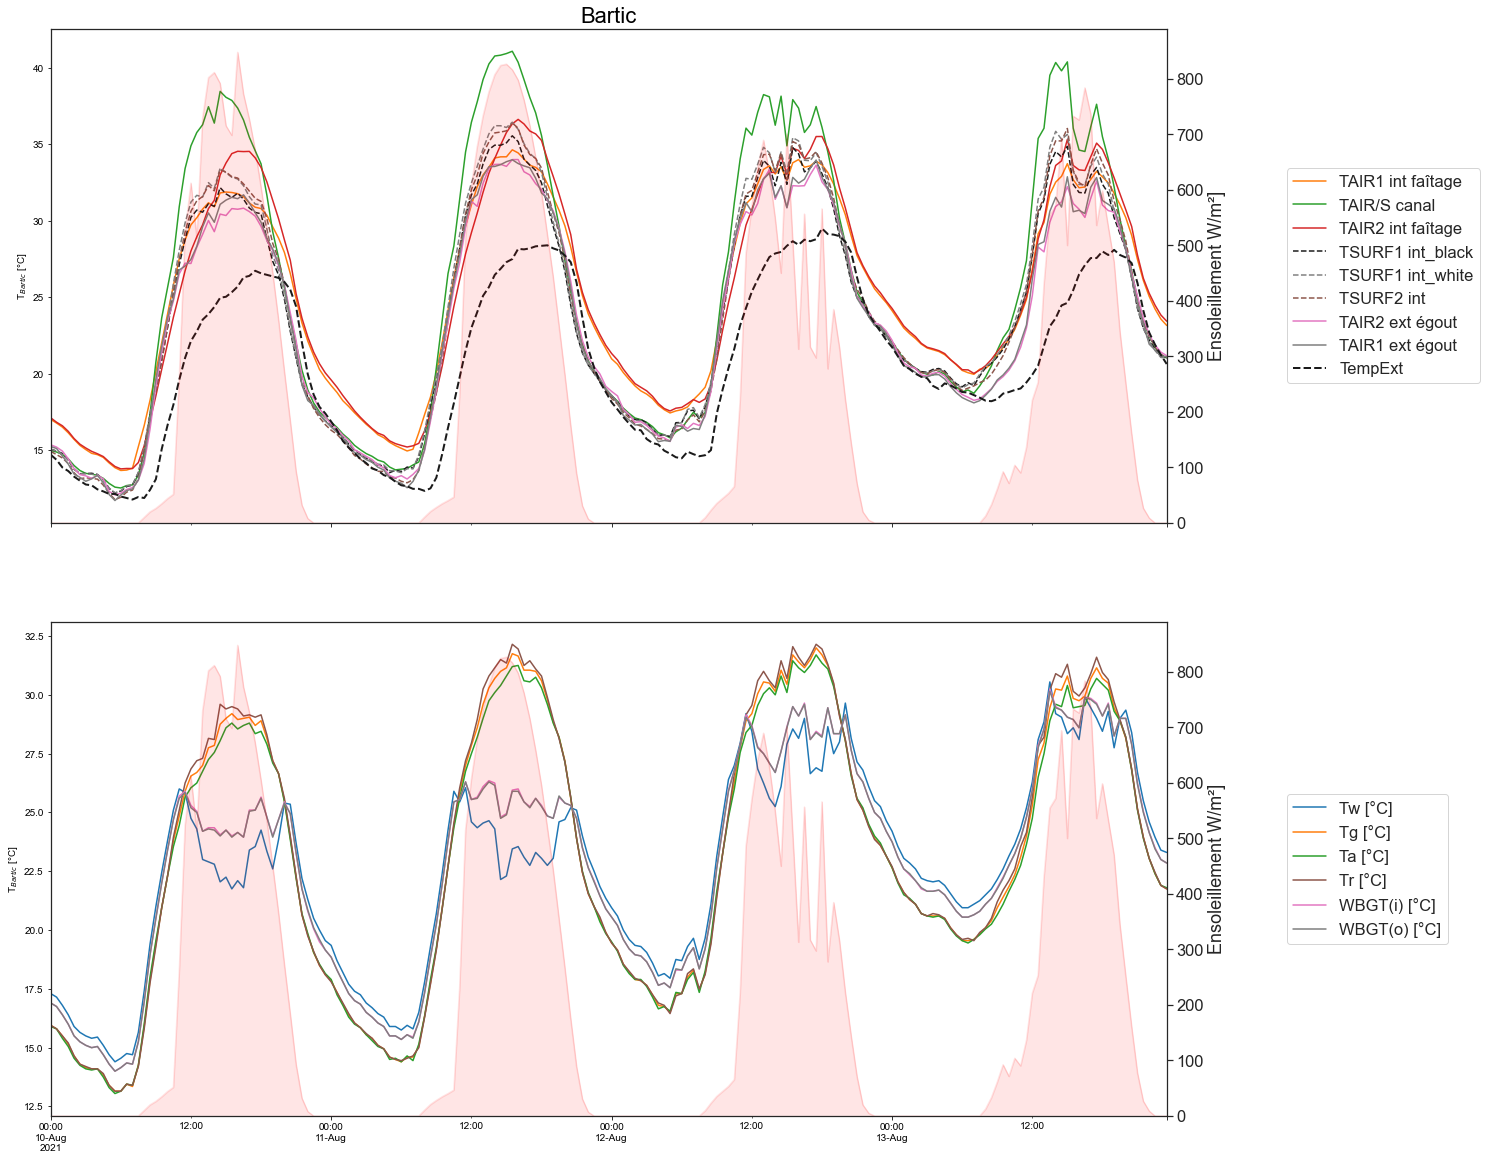

In [11]:
''''
===
plot - tinyTag
===
'''
%matplotlib inline
from tqdm import tqdm_notebook as tqdm

import seaborn as sns
import matplotlib.pyplot as plt
f, (ax0, ax1) = plt.subplots(2,1, figsize=(20, 20))
sns.set(font_scale = 1.5)
sns.set_style("ticks")

barticCorresp = {
'tiny-691956':['TAIR1 int faîtage', '-'], 
'tiny-886651': ['TAIR/S canal', '-'], 
'tiny-692455':['TAIR2 int faîtage', '-'], 
'tiny-886615':['TSURF1 int', '--'], 
'tiny-886055':['TSURF2 int', '--'], 
'tiny-401440': ['TAIR2 ext égout','-'], 
'tiny-401439': ['TAIR1 ext égout','-']
}
#==============================================================================
#bartic
#==============================================================================
palette_bartic_tiny = sns.color_palette("tab10", len(cmbm['bartic'].keys()))
palette_bartic_mat = sns.color_palette("tab10", len(cmbm['bartic']['mat-bartic'].keys()))

# les tinyTags
#==================================================================
for tiny, c in tqdm(zip(cmbm['bartic'].keys(),palette_bartic_tiny)):
    if 'tiny' in tiny:
        try:cmbm['bartic'][tiny]['temperature'][i:e].plot(ax= ax0, color = c, label = barticCorresp[tiny][0], linestyle = barticCorresp[tiny][1])
        except:
            cmbm['bartic'][tiny]['black probe temperature'][i:e].plot(ax= ax0, color = 'k', label = barticCorresp[tiny][0]+'_black', linestyle = barticCorresp[tiny][1])
            cmbm['bartic'][tiny]['white probe temperature'][i:e].plot(ax= ax0, color = 'grey', label = barticCorresp[tiny][0]+'_white', linestyle = barticCorresp[tiny][1])
    else:pass

# le mat
#==================================================================
for mat, c in zip(cmbm['bartic']['mat-bartic'].keys(), palette_bartic_mat):
    if 'RH' in mat:
        pass
    elif 'Va' in mat:
        pass
    else:
        try:cmbm['bartic']['mat-bartic'][mat][i:e].plot(ax= ax1, color = c)
        except:pass
    
weather['TempExt'][i:e].plot(ax= ax0, color = 'k', linewidth = 2, linestyle = '--')
ax0bis = ax0.twinx()
ax1bis = ax1.twinx()
weather['Ensoleillement'][i:e].fillna(0).plot.area(ax = ax0bis, color ='red', alpha = 0.1)
weather['Ensoleillement'][i:e].fillna(0).plot.area(ax = ax1bis, color ='red', alpha = 0.1)
ax0.set_title('Bartic', fontsize = 22)
ax0.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
ax1.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
ax0.set_ylabel('T$_{Bartic}$ [°C]')
ax0bis.set_ylabel('Ensoleillement W/m²]')
ax1bis.set_ylabel('Ensoleillement W/m²]')
ax1.set_ylabel('T$_{Bartic}$ [°C]')
plt.savefig('./schema/bartic.svg', transparent = True, bbox_inches='tight')
plt.show()

Text(0, 0.5, 'T$_{Fibrociment}$ [°C]')

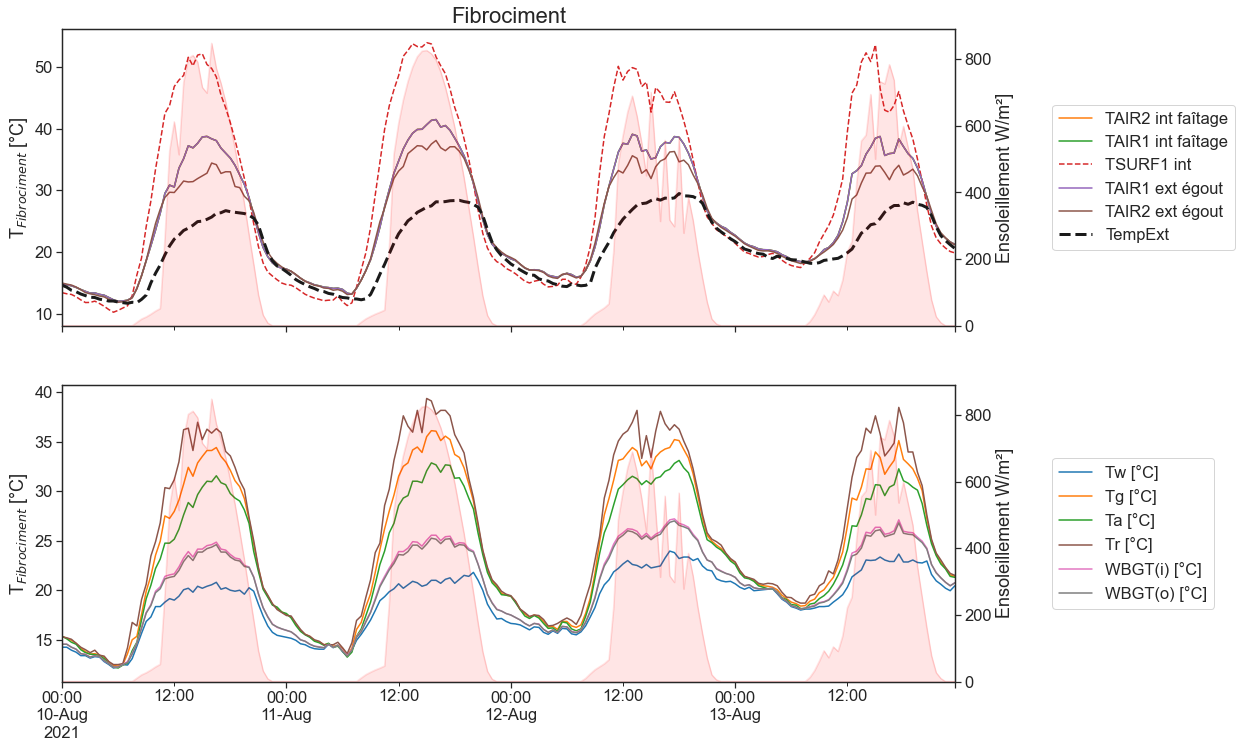

In [12]:
f, (ax0, ax1) = plt.subplots(2,1, figsize=(16, 12))
#==============================================================================
#fibrociment
#==============================================================================
palette_fibrociment_tiny = sns.color_palette("tab10", len(cmbm['fibrociment'].keys()))
palette_fibrociment_mar = sns.color_palette("tab10", len(cmbm['fibrociment']['mat-fibrociment'].keys()))
fibroCorresp = {'tiny-742839' :['TAIR2 int faîtage', '-'], 
                'tiny-859067':['TAIR1 int faîtage', '-'], 
                'tiny-886638':['TSURF1 int', '--'], 
                'tiny-401443':['TAIR1 ext égout', '-'], 
                'tiny-691948':['TAIR2 ext égout', '-']}

# les tinyTags
#==================================================================
for tiny,c in zip(cmbm['fibrociment'].keys(), palette_fibrociment_tiny):
    if 'tiny' in tiny:
        cmbm['fibrociment'][tiny]['temperature'][i:e].plot(ax = ax0, color = c, label = fibroCorresp[tiny][0], linestyle = fibroCorresp[tiny][1])
    else:pass
# le mat
#==================================================================
for mat, c in zip(cmbm['fibrociment']['mat-fibrociment'].keys(), palette_fibrociment_mar):
    if 'RH' in mat:
        pass
#         print()
#         ax1bis = ax1.twinx()
#         (cmbm['fibrociment']['mat-fibrociment'][mat][i:e]).plot(ax= ax1bis, color = c)
    elif 'Va' in mat:
        pass
    else:
        try:cmbm['fibrociment']['mat-fibrociment'][mat][i:e].plot(ax= ax1, color = c)
        except:pass
weather['TempExt'][i:e].plot(ax= ax0, color = 'k', linewidth = 3, linestyle = '--')
ax0bis = ax0.twinx()
ax1bis = ax1.twinx()
weather['Ensoleillement'][i:e].fillna(0).plot.area(ax = ax0bis, color ='red', alpha = 0.1)
weather['Ensoleillement'][i:e].fillna(0).plot.area(ax = ax1bis, color ='red', alpha = 0.1)
ax0.set_title('Fibrociment', fontsize = 22)
ax0.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
ax1.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
ax0bis.set_ylabel('Ensoleillement W/m²]')
ax1bis.set_ylabel('Ensoleillement W/m²]')
ax1.set_ylabel('T$_{Fibrociment}$ [°C]')
ax0.set_ylabel('T$_{Fibrociment}$ [°C]')
# plt.savefig('./schema/fibrociment.svg', transparent = True)

In [13]:
fibroCorresp = {'tiny-742839' :['TAIR2 int faîtage', '-'], 
                'tiny-859067':['TAIR1 int faîtage', '-'], 
                'tiny-886638':['TSURF1 int', '--'], 
                'tiny-401443':['TAIR1 ext égout', '-'], 
                'tiny-691948':['TAIR2 ext égout', '-']}
cmbm['fibrociment']['tiny-742839']

property  temperature    humidity  dew point
date                                                             
2021-08-10 00:00:00      1514    14.890983  100.000000  14.890667
2021-08-10 00:30:00      1517    14.760570  100.000000  14.760333
2021-08-10 01:00:00      1520    14.597333  100.000000  14.597333
2021-08-10 01:30:00      1523    14.327017  100.000000  14.327000
2021-08-10 02:00:00      1526    13.998967  100.000000  13.999000
...                       ...          ...         ...        ...
2021-08-13 21:30:00      2075    24.218827   98.013667  23.881333
2021-08-13 22:00:00      2078    23.038997  100.000000  23.038667
2021-08-13 22:30:00      2081    22.294743  100.000000  22.294667
2021-08-13 23:00:00      2084    21.675830  100.000000  21.675667
2021-08-13 23:30:00      2087    21.291153  100.000000  21.291000

[192 rows x 4 columns]

In [14]:
#======================================
# Tracé des différences
#======================================
barticCorresp = {
'tiny-691956':['TAIR1 int faîtage', '-'], 
'tiny-886651': ['TAIR/S canal', '-'], 
'tiny-692455':['TAIR2 int faîtage', '-'], 
'tiny-886615':['TSURF1 int', '--'], 
'tiny-886055':['TSURF2 int', '--'], 
'tiny-401440': ['TAIR2 ext égout','-'], 
'tiny-401439': ['TAIR1 ext égout','-']
}

fibroCorresp = {'tiny-742839' :['TAIR2 int faîtage', '-'], 
                'tiny-859067':['TAIR1 int faîtage', '-'], 
                'tiny-886638':['TSURF1 int', '--'], 
                'tiny-401443':['TAIR1 ext égout', '-'], 
                'tiny-691948':['TAIR2 ext égout', '-']}
bartic = cmbm['bartic']
fibrociment = cmbm['fibrociment']

In [15]:
tiny = {}
tiny['bartic'] = {}
for name in barticCorresp:
    tiny['bartic'][barticCorresp[name][0]] = bartic[name]

tiny['fibrociment'] = {}
for name in fibroCorresp:
    tiny['fibrociment'][fibroCorresp[name][0]] = fibrociment[name]

In [16]:
listeBartic = {
    'Tsurf int':['TSURF1 int', 'TSURF2 int'],
    'Tair egout': ['TAIR2 ext égout', 'TAIR1 ext égout'],
    'Tfaitage int': ['TAIR1 int faîtage', 'TAIR2 int faîtage'],
}

listeFibrociment = {
    'Tsurf int':['TSURF1 int'],
    'Tair egout': ['TAIR1 ext égout', 'TAIR2 ext égout'],
    'Tfaitage int': ['TAIR1 int faîtage', 'TAIR2 int faîtage'],
}

## Choix de la période

#### cas Tsurf

In [17]:
#bartic
tsurf = {}
tsurf['bartic'] = pd.DataFrame()
for name in listeBartic['Tsurf int']:
    try:tsurf['bartic'][name] = tiny['bartic'][name]['temperature'][i:e].resample('30min').mean()
    except:tsurf['bartic'][name] = tiny['bartic'][name]['white probe temperature'][i:e].resample('30min').mean()
#fibrociment
tsurf['fibrociment'] = pd.DataFrame()
for name in listeFibrociment['Tsurf int']:
    try:tsurf['fibrociment'][name] = tiny['fibrociment'][name]['temperature'][i:e].resample('30min').mean()
    except:tsurf['fibrociment'][name] = tiny['fibrociment'][name]['white probe temperature'][i:e].resample('30min').mean()

#### cas Tair egout

In [18]:
#bartic
tAirEgout = {}
tAirEgout['bartic'] = pd.DataFrame()
for name in listeBartic['Tair egout']:
    tAirEgout['bartic'][name] = tiny['bartic'][name]['temperature'][i:e].resample('30min').mean()
#fibrociment
tAirEgout['fibrociment'] = pd.DataFrame()
for name in listeFibrociment['Tair egout']:
    tAirEgout['fibrociment'][name] = tiny['fibrociment'][name]['temperature'][i:e].resample('30min').mean()
    

#### cas Tfaitage

In [19]:
#bartic
tAirFaitage = {}
tAirFaitage['bartic'] = pd.DataFrame()
for name in listeBartic['Tfaitage int']:
    tAirFaitage['bartic'][name] = tiny['bartic'][name]['temperature'][i:e].resample('30min').mean()
#fibrociment
tAirFaitage['fibrociment'] = pd.DataFrame()
for name in listeFibrociment['Tfaitage int']:
    tAirFaitage['fibrociment'][name] = tiny['fibrociment'][name]['temperature'][i:e].resample('30min').mean()
    

#### cas Tglobe

In [20]:
tGlobe = {}
tGlobe['bartic'] = cmbm['bartic']['mat-bartic']['Tg [°C]'][i:e].resample('30min').mean()
tGlobe['fibrociment'] =cmbm['fibrociment']['mat-fibrociment']['Tg [°C]'][i:e].resample('30min').mean()

#### cas Tw

In [21]:
tW = {}
tW['bartic'] = cmbm['bartic']['mat-bartic']['Tw [°C]'][i:e].resample('30min').mean()
tW['fibrociment'] =cmbm['fibrociment']['mat-fibrociment']['Tw [°C]'][i:e].resample('30min').mean()

#### cas RH [%]

In [22]:
RH = {}
RH['bartic'] = cmbm['bartic']['mat-bartic']['RH [%]'][i:e].resample('30min').mean()
RH['fibrociment'] =cmbm['fibrociment']['mat-fibrociment']['RH [%]'][i:e].resample('30min').mean()

In [23]:
#### cas Ta mât confort

In [24]:
tA = {}
tA['bartic'] = cmbm['bartic']['mat-bartic']['Ta [°C]'][i:e].resample('30min').mean()
tA['fibrociment'] =cmbm['fibrociment']['mat-fibrociment']['Ta [°C]'][i:e].resample('30min').mean()

# les plots

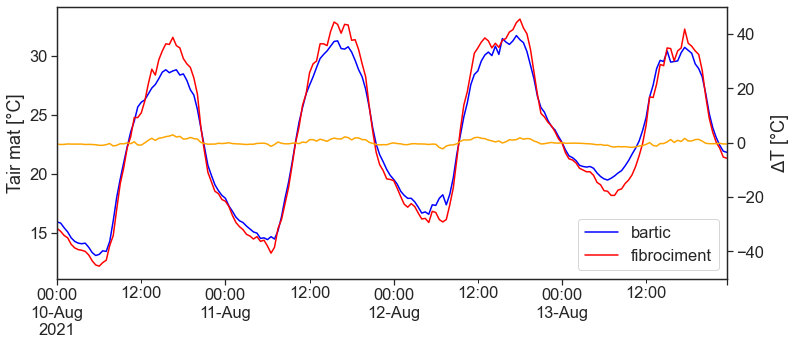

In [25]:
f, ax0 = plt.subplots(1,1, figsize=(12, 5))
delta = {}
#TAir mât confort
#========================================================================
tA['bartic'].plot(ax = ax0, color = 'blue', label = 'bartic')
tA['fibrociment'].plot(ax = ax0, color = 'red', label = 'fibrociment')
ax0bis = ax0.twinx()
df = tA['fibrociment'] - tA['bartic']
delta['ta'] = df
df.plot(ax = ax0bis, color = 'orange')
ax0bis.set_ylim([-50, 50])
ax0.set_ylabel('Tair mat [°C]')
ax0bis.set_ylabel('$\Delta$T [°C]')
ax0.legend()
# plt.savefig('./schema/TairMat.svg', transparent = True, bbox_inches='tight')


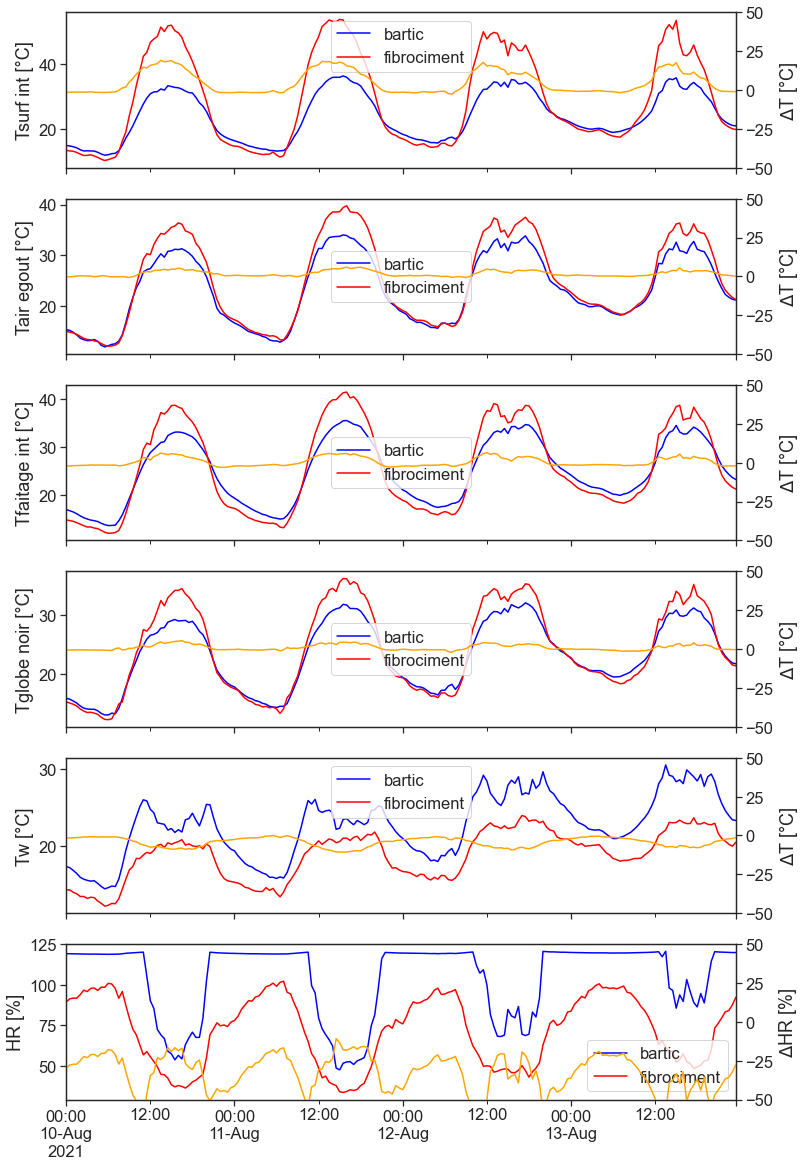

In [26]:
f, (ax0, ax1, ax2, ax3, ax4, ax5) = plt.subplots(6,1, figsize=(12, 20))

#Tsurf
#========================================================================
tsurf['bartic'].mean(axis = 1).plot(ax = ax0, color = 'blue', label = 'bartic')
tsurf['fibrociment'].mean(axis = 1).plot(ax = ax0, color = 'red', label = 'fibrociment')
ax0bis = ax0.twinx()
df = tsurf['fibrociment'].mean(axis = 1) - tsurf['bartic'].mean(axis = 1)
delta['tsurf'] = df
df.plot(ax = ax0bis, color = 'orange')
ax0bis.set_ylim([-50, 50])
ax0.set_ylabel('Tsurf int [°C]')
ax0bis.set_ylabel('$\Delta$T [°C]')
ax0.legend()




#Tair egout
#========================================================================
tAirEgout['bartic'].mean(axis = 1).plot(ax = ax1, color = 'blue', label = 'bartic')
tAirEgout['fibrociment'].mean(axis = 1).plot(ax = ax1, color = 'red', label = 'fibrociment')
ax1bis = ax1.twinx()
df = tAirEgout['fibrociment'].mean(axis = 1) - tAirEgout['bartic'].mean(axis = 1)
delta['tair_egout'] = df
df.plot(ax = ax1bis, color = 'orange')
ax1bis.set_ylim([-50, 50])
ax1.set_ylabel('Tair egout [°C]')
ax1bis.set_ylabel('$\Delta$T [°C]')
ax1.legend()




#Tfaitage
#========================================================================
tAirFaitage['bartic'].mean(axis = 1).plot(ax = ax2, color = 'blue', label = 'bartic')
tAirFaitage['fibrociment'].mean(axis = 1).plot(ax = ax2, color = 'red', label = 'fibrociment')
ax2bis = ax2.twinx()
df = tAirFaitage['fibrociment'].mean(axis = 1) - tAirFaitage['bartic'].mean(axis = 1)
delta['tair_faitage'] = df
df.plot(ax = ax2bis, color = 'orange')
ax2bis.set_ylim([-50, 50])
ax2.set_ylabel('Tfaitage int [°C]')
ax2bis.set_ylabel('$\Delta$T [°C]')
ax2.legend()


#Tglobe
#========================================================================
tGlobe['bartic'].plot(ax = ax3, color = 'blue', label = 'bartic')
tGlobe['fibrociment'].plot(ax = ax3, color = 'red', label = 'fibrociment')
ax3.set_ylabel('Tglobe noir [°C]')
ax3bis = ax3.twinx()
df = tGlobe['fibrociment'] - tGlobe['bartic']
delta['tair_globe'] = df
df.plot(ax = ax3bis, color = 'orange')
ax3bis.set_ylim([-50, 50])
ax3bis.set_ylabel('$\Delta$T [°C]')
ax3.legend()

#Tglobe - Tw
#========================================================================
tW['bartic'].plot(ax = ax4, color = 'blue', label = 'bartic')
tW['fibrociment'].plot(ax = ax4, color = 'red', label = 'fibrociment')
ax4.set_ylabel('Tw [°C]')
ax4bis = ax4.twinx()
df = tW['fibrociment'] - tGlobe['bartic']
delta['tw'] = df
df.plot(ax = ax4bis, color = 'orange')
ax4bis.set_ylim([-50, 50])
ax4bis.set_ylabel('$\Delta$T [°C]')
ax4.legend()

# Humidite
#========================================================================
RH['bartic'].plot(ax = ax5, color = 'blue', label = 'bartic')
RH['fibrociment'].plot(ax = ax5, color = 'red', label = 'fibrociment')
ax5.set_ylabel('HR [%]')
ax5bis = ax5.twinx()
df = RH['fibrociment'] - RH['bartic']
delta['HR'] = df
df.plot(ax = ax5bis, color = 'orange')
ax5bis.set_ylim([-50, 50])
ax5bis.set_ylabel('$\Delta$HR [%]')
ax5.legend()

# plt.savefig('./schema/compare.svg', transparent = True)

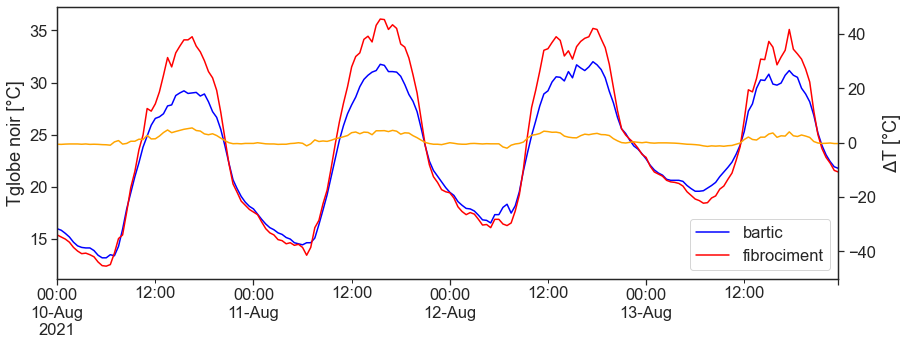

In [27]:
f, (ax3) = plt.subplots(1,1, figsize=(14, 5))
#Tsurf
#========================================================================
tGlobe['bartic'].plot(ax = ax3, color = 'blue', label = 'bartic')
tGlobe['fibrociment'].plot(ax = ax3, color = 'red', label = 'fibrociment')
ax3.set_ylabel('Tglobe noir [°C]')
ax3bis = ax3.twinx()
df = tGlobe['fibrociment'] - tGlobe['bartic']
delta['tair_globe'] = df
df.plot(ax = ax3bis, color = 'orange')
ax3bis.set_ylim([-50, 50])
ax3bis.set_ylabel('$\Delta$T [°C]')
ax3.legend()
# plt.savefig('./schema/TaiGlobe.svg', transparent = True, bbox_inches='tight')

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, '$\\Delta$T [°C]')

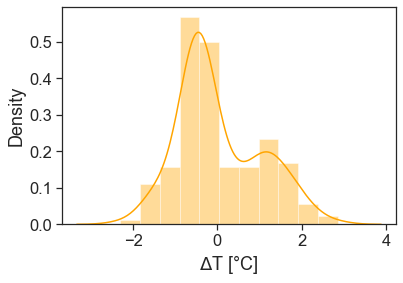

In [28]:
f, (ax0) = plt.subplots(1,1, figsize=(6, 4))
sns.distplot(delta['ta'], ax = ax0, color = 'orange')
ax0.set_xlabel('$\Delta$T [°C]')
# plt.savefig('./schema/DT_tAirMat.svg', transparent = True, bbox_inches='tight')

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

Text(0, 0.5, '$\\Delta$T [°C]')

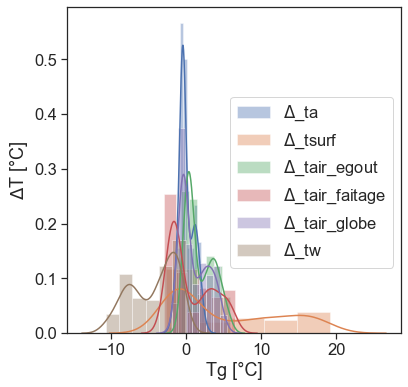

In [29]:
#==============================================================================
# i = '2021-08-09'
# e = '2021-08-11'
f, (ax) = plt.subplots(1,1, figsize=(6, 6))
delta['ta'].describe()
for k in delta.keys():
    if k =='HR':
        pass
    else:
        sns.distplot(delta[k][i:e], label = '$\Delta$_'+k, ax = ax)
plt.legend(bbox_to_anchor=(1., 0.75))
plt.ylabel('$\Delta$T [°C]')
# plt.savefig('./schema/DISTT_evolution_zoom.svg', transparent = True, bbox_inches='tight')

# CONSTRUCTIONS DES TABLEURS EXCEL

In [30]:
barticCorresp = {
'tiny-691956':['TAIR1 int faîtage', '-'], 
'tiny-886651': ['TAIR/S canal', '-'], 
'tiny-692455':['TAIR2 int faîtage', '-'], 
'tiny-886615':['TSURF1 int', '--'], 
'tiny-886055':['TSURF2 int', '--'], 
'tiny-401440': ['TAIR2 ext égout','-'], 
'tiny-401439': ['TAIR1 ext égout','-']
}
cmbm['bartic'].keys()
barticTiny = {}
for k in cmbm['bartic'].keys():
    try:barticTiny[barticCorresp[k][0]] = cmbm['bartic'][k]
    except:pass

In [31]:
fibroCorresp = {'tiny-742839' :['TAIR2 int faîtage', '-'], 
                'tiny-859067':['TAIR1 int faîtage', '-'], 
                'tiny-886638':['TSURF1 int', '--'], 
                'tiny-401443':['TAIR1 ext égout', '-'], 
                'tiny-691948':['TAIR2 ext égout', '-']}
fibroTiny = {}
for k in cmbm['fibrociment'].keys():
    print(k)
    try:fibroTiny[fibroCorresp[k][0]] = cmbm['fibrociment'][k]
    except:pass

mat-fibrociment
tiny-742839
tiny-859067
tiny-886638
tiny-401443
tiny-691948


In [81]:
barticTiny['Tsurf_moy'] = (barticTiny['TSURF2 int']['temperature']+barticTiny['TSURF1 int']['black probe temperature']+barticTiny['TSURF1 int']['white probe temperature'])/3
barticTiny['Tegout,moy'] = (barticTiny['TAIR1 ext égout']['temperature']+barticTiny['TAIR2 ext égout']['temperature'])/2

df = pd.concat([cmbm['bartic']['mat-bartic'], barticTiny['Tsurf_moy']], axis = 1)
df = df.rename(columns={0: "Tsurf,moy"})
final = pd.concat([df, barticTiny['Tegout,moy'], weather[i:e].fillna(0)[['Ensoleillement', 'TempExt', 'LeverCoucherSoleil', 'WindDir']]], axis = 1)
final = final.rename(columns={"temperature": "Tegout,moy"})
final = final.resample('1h').mean()
final.to_excel('bartic.xlsx')

In [79]:
# df = pd.concat([cmbm['fibrociment']['mat-fibrociment'], fibroTiny['TSURF1 int']], axis = 1)
# df = df.rename(columns={"temperature": "Tsurf"})
# final = pd.concat([df, fibroTiny['TAIR1 ext égout'], weather[i:e].fillna(0)[['Ensoleillement', 'TempExt', 'LeverCoucherSoleil', 'WindDir']]], axis = 1)
# final = final.rename(columns={"temperature": "Text_egout"})
# final = final.resample('1h').mean()
# final.to_excel('fibro.xlsx')

In [76]:
final = final.resample('1h').mean()

In [77]:
final


Tw [°C]  Tg [°C]  Ta [°C]   RH [%]  Va [m/s]  Tr [°C]  \
2021-08-10 00:00:00   17.225   15.875   15.850  119.175    0.0275   15.875   
2021-08-10 01:00:00   16.600   15.325   15.225  119.075    0.0450   15.350   
2021-08-10 02:00:00   15.775   14.475   14.400  119.000    0.0725   14.475   
2021-08-10 03:00:00   15.450   14.125   14.075  118.925    0.0550   14.150   
2021-08-10 04:00:00   15.275   13.975   13.925  118.925    0.0600   14.000   
...                      ...      ...      ...      ...       ...      ...   
2021-08-13 19:00:00   28.375   29.175   29.100   95.275    0.3050   29.325   
2021-08-13 20:00:00   28.875   27.500   27.500  117.450    0.0900   27.525   
2021-08-13 21:00:00   26.100   24.550   24.500  120.200    0.0100   24.550   
2021-08-13 22:00:00   24.275   22.725   22.725  119.950    0.0300   22.750   
2021-08-13 23:00:00   23.350   21.825   21.850  119.900    0.0175   21.825   

                     WBGT(i) [°C]  WBGT(o) [°C]      Tsurf  temperature  \
2021-08-10 00:00:00        16.825        16.825  14.936909    15.221189   
2021-08-10 01:00:00        16.200        16.200  14.470445    14.518316   
2021-08-10 02:00:00        15.375        15.375  13.517354    13.461977   
2021-08-10 03:00:00        15.050        15.050  13.364614    13.138756   
2021-08-10 04:00:00        14.875        14.875  13.121598    13.170295   
...                           ...           ...        ...          ...   
2021-08-13 19:00:00        28.625        28.625  30.132407    30.097457   
2021-08-13 20:00:00        28.450        28.450  27.399997    27.275470   
2021-08-13 21:00:00        25.650        25.600  23.761817    24.139466   
2021-08-13 22:00:00        23.825        23.800  21.949762    21.980256   
2021-08-13 23:00:00        22.925        22.925  21.105769    21.218892   

                     Ensoleillement    TempExt  LeverCoucherSoleil     WindDir  
2021-08-10 00:00:00        0.000000  14.533333                 0.0   55.000000  
2021-08-10 01:00:00        0.000000  13.750000                 0.0   55.000000  
2021-08-10 02:00:00        0.000000  13.133333                 0.0   55.000000  
2021-08-10 03:00:00        0.000000  12.725000                 0.0   55.000000  
2021-08-10 04:00:00        0.000000  12.366667                 0.0   55.000000  
...                             ...        ...                 ...         ...  
2021-08-13 19:00:00      406.833333  27.933333                 0.0  290.500000  
2021-08-13 20:00:00      206.000000  27.416667                 0.0  307.166667  
2021-08-13 21:00:00       52.000000  25.033333                 0.0  313.000000  
2021-08-13 22:00:00        4.500000  22.300000                 0.0  167.500000  
2021-08-13 23:00:00        0.000000  20.933333                 0.0   22.000000  

[96 rows x 14 columns]